## **Graduate Rotational Internship Program by The Sparks Foundation**

## **BIJURIKA BANDYOPADHYAY**

## **Task 3: Prediction using Unsupervised Machine Learning**

### **K-mean clustering**
The task is to predict the optimum number of clusters and represent it visually by using K-Means clustering algorithm.

In [128]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

%matplotlib inline

In [151]:
iris=datasets.load_iris()
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [130]:
# dataframe of iris data
iris_df=pd.DataFrame(iris.data,columns=iris.feature_names)

## Descriptive statistics details

In [131]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


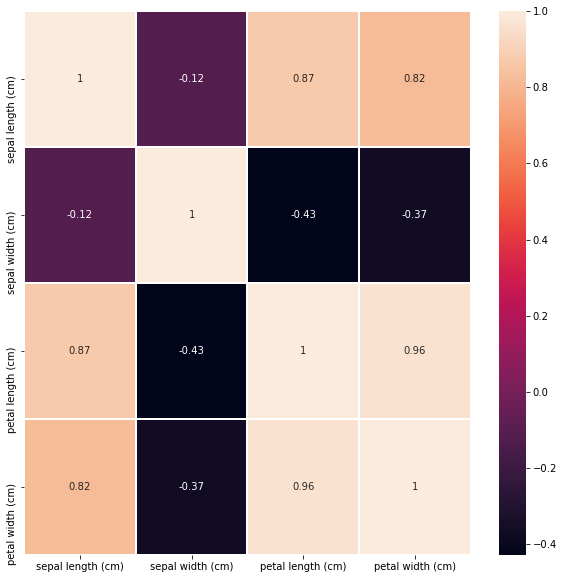

In [132]:
# correlation between the variables using Heat Map
fig=plt.figure(figsize=(10,10))
sns.heatmap(iris_data.corr(),linewidths=1,annot=True)
iris_data.corr()

### Optimum number of clusters for K Means and finding the value of K

In [133]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
wcss    


[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.25600931571815,
 46.44618205128204,
 39.03998724608725,
 34.299712121212146,
 30.014398496240617,
 28.03690635345049,
 26.534529220779234]

### Graphical representation of the Elbow Method

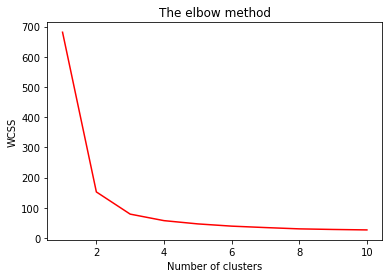

In [134]:
# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss,color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

### *From the above plot we can clearly see the 'elbow' at point 3, which is optimal in this case. For this reason this method of finding 'k' is called 'The Elbow Method'.*

### Hence the number of clusters is K = '3'

In [135]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(3)
kmeans.fit(iris_df)
y_kmeans=iris_df.copy()
y_kmeans['predicted'] = kmeans.fit_predict(iris_df)
y_kmeans.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),predicted
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2


### Graphical Representation of the K cluster algorithm

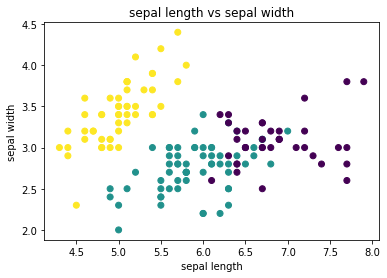

In [149]:
#visualising cluster according to predicted value for sepal length and sepal width
plt.scatter(x='sepal length (cm)',y='sepal width (cm)',c='predicted',data=y_kmeans)
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('sepal length vs sepal width')
plt.show()

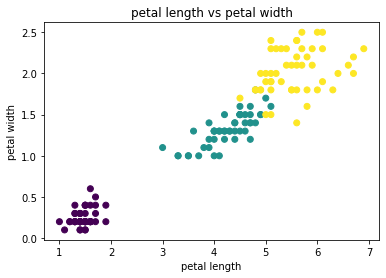

In [150]:
#visualising clusters for true labels
plt.scatter(x='petal length (cm)',y='petal width (cm)',c=iris.target,data=y_kmeans)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('petal length vs petal width')
plt.show()

*From the above diagram we can say that cluster size 3 is the optimal solution*

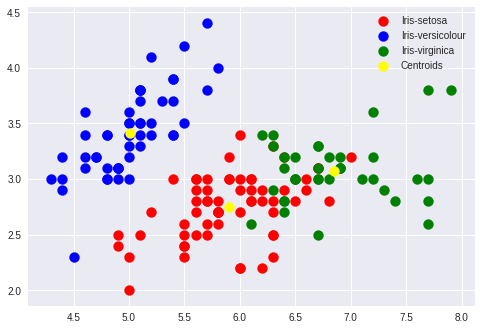

In [ ]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()